In [ ]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import os
os.chdir('/content/drive/My Drive/ML-Resources/training_data')

## Mengambil file

In [ ]:
import cv2
import numpy as np
from tqdm import tqdm
import os

# Define your desired image width and height
your_image_width = 64
your_image_height = 64

data = []
labels = []

# Assuming the code is in the directory where the images are located
current_directory = '/content/drive/My Drive/ML-Resources/training_data'

for folder_name in os.listdir(current_directory):
    folder_path = os.path.join(current_directory, folder_name)

    for img_name in tqdm(os.listdir(folder_path)):
        img_path = os.path.join(folder_path, img_name)
        img = cv2.imread(img_path)
        img = cv2.resize(img, (your_image_width, your_image_height))
        data.append(img)
        labels.append(folder_name)

data = np.array(data)
labels = np.array(labels)


100%|██████████| 573/573 [00:08<00:00, 66.53it/s] 
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]


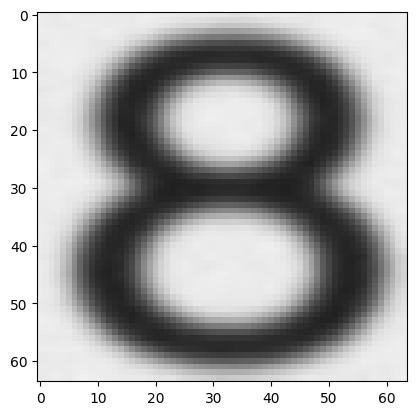

In [ ]:
plt.imshow(data[0])

In [ ]:
labels[0]

'8'

In [ ]:
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelBinarizer
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator

## Preprocessing

In [ ]:
# Preprocess data
data = data.astype('float32') / 255.0  # Normalize pixel values to be between 0 and 1
data = data.reshape((data.shape[0], your_image_width, your_image_height, 3))  # Reshape data to match input shape

In [ ]:
# Assuming you are using one-hot encoding
label_binarizer = LabelBinarizer()
labels_one_hot = label_binarizer.fit_transform(labels)
labels_one_hot = tf.keras.utils.to_categorical(labels_one_hot, num_classes=36)  # Assuming 36 classes for binary classification

# Convert one-hot encoded labels to a single column of probabilities
y_train = labels_one_hot[:, 0]  # Assuming binary classification
y_test = labels_one_hot[:, 0]

## Split Data

In [ ]:
# Convert labels to binary format (0 or 1)
y_train_binary = np.argmax(y_train, axis=1)
y_test_binary = np.argmax(y_test, axis=1)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(data, y_train_binary, test_size=0.2, random_state=42)

## Augmentation

In [ ]:
# Data Augmentation
datagen = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

In [ ]:
datagen.fit(data)  # Fit the data augmentation pipeline to the reshaped training data

## Build CNN Model

In [ ]:
  # Build CNN Model
  model = Sequential()

  model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(your_image_width, your_image_height, 3)))
  model.add(MaxPooling2D(2, 2))

  model.add(Conv2D(64, (3, 3), activation='relu'))
  model.add(MaxPooling2D(2, 2))

  model.add(Conv2D(128, (3, 3), activation='relu'))
  model.add(MaxPooling2D(2, 2))

  model.add(Flatten())
  model.add(Dense(256, activation='relu'))
  model.add(Dropout(0.5))
  model.add(Dense(1, activation='sigmoid'))  # Using sigmoid for binary classification

  model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

  # Train the model with data augmentation
  batch_size = 32
  history = model.fit(datagen.flow(X_train, y_train, batch_size=batch_size),
                      steps_per_epoch=len(X_train) // batch_size,
                      epochs=20,
                      validation_data=(X_test, y_test),
                      shuffle=True)

  # Save the model to an HDF5 file
  model.save('/content/drive/My Drive/ML-Resources/my_model.h5')

Epoch 1/20
181/181 [==============================] - 24s 64ms/step - loss: 0.2461 - accuracy: 0.9215 - val_loss: 0.1026 - val_accuracy: 0.9697
Epoch 2/20
181/181 [==============================] - 9s 52ms/step - loss: 0.1662 - accuracy: 0.9353 - val_loss: 0.0930 - val_accuracy: 0.9732
Epoch 3/20
181/181 [==============================] - 10s 57ms/step - loss: 0.1278 - accuracy: 0.9511 - val_loss: 0.0554 - val_accuracy: 0.9828
Epoch 4/20
181/181 [==============================] - 12s 64ms/step - loss: 0.1257 - accuracy: 0.9521 - val_loss: 0.0628 - val_accuracy: 0.9746
Epoch 5/20
181/181 [==============================] - 12s 64ms/step - loss: 0.1037 - accuracy: 0.9652 - val_loss: 0.0583 - val_accuracy: 0.9766
Epoch 6/20
181/181 [==============================] - 10s 54ms/step - loss: 0.0946 - accuracy: 0.9675 - val_loss: 0.0271 - val_accuracy: 0.9904
Epoch 7/20
181/181 [==============================] - 12s 65ms/step - loss: 0.0767 - accuracy: 0.9735 - val_loss: 0.0177 - val_accuracy: 

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


## Test Data

In [ ]:
# Assuming you have y_test from the previous code
# Check the shape of y_test before applying np.argmax
print("Shape of y_test before argmax:", y_test.shape)

# Apply np.argmax if y_test has more than one dimension
if len(y_test.shape) > 1:
    y_test_binary = np.argmax(y_test, axis=1)
else:
    # Handle the case where y_test is already one-dimensional
    y_test_binary = y_test

# Assuming you have X_test and y_test_binary from the previous code
# Evaluate the model on the test set
loss, accuracy = model.evaluate(X_test, y_test_binary)

print(f'Test Loss: {loss:.4f}')
print(f'Test Accuracy: {accuracy * 100:.2f}%')

# Make predictions on a few samples
num_samples_to_predict = 5
sample_indices = np.random.choice(len(X_test), num_samples_to_predict, replace=False)

for idx in sample_indices:
    sample = X_test[idx].reshape(1, your_image_width, your_image_height, 3)
    true_label = y_test_binary[idx]

    # Predict the class probabilities
    predictions = model.predict(sample)
    predicted_label = np.argmax(predictions)

    print(f'\nSample {idx + 1}:')
    print(f'True Label: {true_label}')
    print(f'Predicted Label: {predicted_label}')
    print(f'Class Probabilities: {predictions}')


Shape of y_test before argmax: (1454,)
46/46 [==============================] - 0s 4ms/step - loss: 0.0049 - accuracy: 0.9986
Test Loss: 0.0049
Test Accuracy: 99.86%
1/1 [==============================] - 0s 192ms/step

Sample 860:
True Label: 0
Predicted Label: 0
Class Probabilities: [[6.537906e-11]]
1/1 [==============================] - 0s 32ms/step

Sample 636:
True Label: 0
Predicted Label: 0
Class Probabilities: [[1.1497918e-07]]
1/1 [==============================] - 0s 30ms/step

Sample 502:
True Label: 0
Predicted Label: 0
Class Probabilities: [[9.622013e-11]]
1/1 [==============================] - 0s 27ms/step

Sample 499:
True Label: 0
Predicted Label: 0
Class Probabilities: [[4.6130285e-08]]
1/1 [==============================] - 0s 26ms/step

Sample 1273:
True Label: 0
Predicted Label: 0
Class Probabilities: [[1.1276247e-15]]
